<a href="https://colab.research.google.com/github/shardulburde/Exotic-Options-Pricing/blob/main/BarrierOptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#Reading Excel Data
#Excel sheet link in next comment
#https://drive.google.com/file/d/1UXq6kIWAaGUmzk41B4ReCg5L_k_vBtas/view?usp=sharing

import pandas as pd
xls = pd.ExcelFile('/content/drive/MyDrive/IndusInd/Barrier_Data.xlsx')
df = pd.read_excel(xls, 'Input')
df1 = pd.read_excel(xls, 'MktData')

In [136]:
df1

,Tenor,DCF,ATM,Unnamed: 3,Unnamed: 4,25D RR,Unnamed: 6,Unnamed: 7,25D BF,Unnamed: 9,Unnamed: 10,10D RR,Unnamed: 12,Unnamed: 13,10D BF,Unnamed: 15,Unnamed: 16,USD depo,INR Depo,Fwds
0,NaN,NaN,Bid,Ask,Mid,Bid,Ask,Mid,Bid,Ask,Mid,Bid,Ask,Mid,Bid,Ask,Mid,NaN,NaN,NaN
1,1W,0.019444,4.15,5.15,0.0465,0.105,0.805,0.00455,-0.145,0.355,0.00105,0.225,1.425,0.00825,-0.07,0.73,0.0033,0.0060,0.0410,73.3236
2,2W,0.038889,4.165,5.165,0.04665,0.1,0.8,0.0045,-0.15,0.35,0.001,0.21,1.415,0.008125,-0.08,0.725,0.003225,0.0018,0.0410,73.3856
3,3W,0.058333,4.16,5.155,0.046575,0.105,0.8,0.004525,-0.145,0.35,0.001025,0.215,1.41,0.008125,-0.075,0.725,0.00325,0.0004,0.0410,73.4475
4,1M,0.083333,4.38,4.93,0.04655,0.34,0.725,0.005325,0.02,0.295,0.001575,0.625,1.285,0.00955,0.265,0.71,0.004875,-0.0005,0.0410,73.5272
5,2M,0.166667,4.67,5.12,0.04895,0.42,0.735,0.005775,0.08,0.305,0.001925,0.785,1.325,0.01055,0.405,0.765,0.00585,0.0005,0.0426,73.8056
6,3M,0.250000,5,5.45,0.05225,0.47,0.785,0.006275,0.11,0.335,0.002225,0.895,1.435,0.01165,0.505,0.86,0.006825,0.0004,0.0427,74.0667
7,4M,0.333333,5.195,5.61,0.054025,0.485,0.775,0.0063,0.145,0.355,0.0025,0.925,1.42,0.011725,0.6,0.93,0.00765,0.0002,0.0433,74.3622
8,5M,0.416667,5.316,5.721,0.055185,0.505,0.789,0.00647,0.183,0.387,0.00285,0.996,1.48,0.01238,0.741,1.063,0.00902,0.0003,0.0439,74.6300
9,6M,0.500000,5.365,5.765,0.05565,0.525,0.805,0.00665,0.21,0.41,0.0031,1.005,1.485,0.01245,0.815,1.135,0.00975,0.0006,0.0445,74.9071


In [137]:
#Interpolating Market Vol Data
from scipy import interpolate

def atm(tenor):

  x_points=pd.DataFrame([])   
  y_points=pd.DataFrame([])  

  for i in range(19):
    x=pd.DataFrame([df1._get_value(i+1,1,True)])
    y=pd.DataFrame([df1._get_value(i+1,4,True)])
    x_points=x_points.append(x, ignore_index = True)
    y_points=y_points.append(y, ignore_index = True)
      
  tck = interpolate.splrep(x_points, y_points)
  return interpolate.splev(tenor, tck)

def rr25d(tenor):

  x_points=pd.DataFrame([])   
  y_points=pd.DataFrame([])  

  for i in range(19):
    x=pd.DataFrame([df1._get_value(i+1,1,True)])
    y=pd.DataFrame([df1._get_value(i+1,7,True)])
    x_points=x_points.append(x, ignore_index = True)
    y_points=y_points.append(y, ignore_index = True)
      
  tck = interpolate.splrep(x_points, y_points)
  return interpolate.splev(tenor, tck)

def fly25d(tenor):

  x_points=pd.DataFrame([])   
  y_points=pd.DataFrame([])  

  for i in range(19):
    x=pd.DataFrame([df1._get_value(i+1,1,True)])
    y=pd.DataFrame([df1._get_value(i+1,10,True)])
    x_points=x_points.append(x, ignore_index = True)
    y_points=y_points.append(y, ignore_index = True)
      
  tck = interpolate.splrep(x_points, y_points)
  return interpolate.splev(tenor, tck)


def rr10d(tenor):

  x_points=pd.DataFrame([])   
  y_points=pd.DataFrame([])  

  for i in range(19):
    x=pd.DataFrame([df1._get_value(i+1,1,True)])
    y=pd.DataFrame([df1._get_value(i+1,13,True)])
    x_points=x_points.append(x, ignore_index = True)
    y_points=y_points.append(y, ignore_index = True)

  tck = interpolate.splrep(x_points, y_points)
  return interpolate.splev(tenor, tck)
      

def fly10d(tenor):

  x_points=pd.DataFrame([])   
  y_points=pd.DataFrame([])  

  for i in range(19):
    x=pd.DataFrame([df1._get_value(i+1,1,True)])
    y=pd.DataFrame([df1._get_value(i+1,16,True)])
    x_points=x_points.append(x, ignore_index = True)
    y_points=y_points.append(y, ignore_index = True)
    
  tck = interpolate.splrep(x_points, y_points)
  return interpolate.splev(tenor, tck)

In [138]:
#Making Call Delta functions that return vol for given tenor from mkt data

def d10(tenor):
  vol=atm(tenor)+fly10d(tenor)+rr10d(tenor)/2

  return vol

def d25(tenor):
  vol=atm(tenor)+fly25d(tenor)+rr25d(tenor)/2

  return vol

def d75(tenor):
  vol=atm(tenor)+fly25d(tenor)-rr25d(tenor)/2

  return vol

def d90(tenor):
  vol=atm(tenor)+fly10d(tenor)-rr10d(tenor)/2

  return vol

In [192]:
#Interpolation for vol for tenor b/w 0.1, 0.25, 0.5, 0.75 and 0.9 call delta

from scipy import interpolate

def vol(delta,tenor):

  y1=d10(tenor)
  y2=d25(tenor)
  y3=atm(tenor)
  y4=d75(tenor)
  y5=d90(tenor)

  x_points = [0.1, 0.25, 0.5, 0.75, 0.9]
  y_points = [y1,y2,y3,y4,y5]

  tck = interpolate.splrep(x_points, y_points)
  return float(interpolate.splev(delta, tck))

vol(0.1,1)


0.07722499999999997

In [140]:
#Making Vol Lookup Function

import numpy as np
import math
import scipy
from scipy.stats import norm

#Vol for Up Out
def VolUpOut():
  
  tenor=df._get_value(4,1,True)
  rate=df._get_value(5,1,True)-df._get_value(6,1,True)
  strike=df._get_value(0,1,True)
  spot=df._get_value(1,1,True)

  
  v = atm(tenor)
    
  for i in range(4):
    d=(np.log(spot/strike)+(rate-v*v/2)*tenor)/(v*math.sqrt(tenor))
    delta=scipy.stats.norm.cdf(d) 
    v=vol(delta,tenor) 

  return v


#Vol for Down Out
def VolDownOut():
  
  tenor=df._get_value(4,2,True)
  rate=df._get_value(5,2,True)-df._get_value(6,2,True)
  strike=df._get_value(0,2,True)
  spot=df._get_value(1,2,True)

  v = atm(tenor)
    
  for i in range(4):
    d=(np.log(spot/strike)+(rate-v*v/2)*tenor)/(v*math.sqrt(tenor))
    delta=scipy.stats.norm.cdf(d) 
    v=vol(delta,tenor)

  return v
  
  
#Vol for Up In
def VolUpIn():
  
  tenor=df._get_value(4,3,True)
  rate=df._get_value(5,3,True)-df._get_value(6,3,True)
  strike=df._get_value(0,3,True)
  spot=df._get_value(1,3,True)

  v = atm(tenor)
    
  for i in range(4):
    d=(np.log(spot/strike)+(rate-v*v/2)*tenor)/(v*math.sqrt(tenor))
    delta=scipy.stats.norm.cdf(d) 
    v=vol(delta,tenor)

  return v

#Vol for Down In
def VolDownIn():
  
  tenor=df._get_value(4,4,True)
  rate=df._get_value(5,4,True)-df._get_value(6,4,True)
  strike=df._get_value(0,4,True)
  spot=df._get_value(1,4,True)

  v =atm(tenor)

    
  for i in range(4):
    d=(np.log(spot/strike)+(rate-v*v/2)*tenor)/(v*math.sqrt(tenor))
    delta=scipy.stats.norm.cdf(d) 
    v=vol(delta,tenor)

  return v
  
  




In [141]:
import math
import numpy as np

#Creating Knock Out Pricing Functions

#Up and Out

def UpOut(strike, spot, tenor, INRr, USDr, vol, t, numsim, bar):
  
  
  rate = np.log(1+(INRr)-(USDr))
  
  sum = 0.0
  
  if vol==0:
    vol=VolUpOut()
  else:
    vol=vol

  n=round(tenor*365/t)

    
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd > bar :
        fwd=0
  
    payoff = max(fwd - strike, 0)
    sum = sum + payoff

  Up_Out_Call=100*(sum / numsim) * math.exp(-rate * tenor)

  sum = 0.0
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd > bar :
        fwd=0
  
    if fwd == 0: 
      payoff = 0
        
    else:
      payoff = max(strike - fwd, 0)
            
         
    sum = sum + payoff

  Up_Out_Put=100*(sum / numsim) * math.exp(-rate * tenor)

         
  return Up_Out_Call,Up_Out_Put




#Down and Out

def DownOut(strike, spot, tenor, INRr, USDr, vol, t, numsim, bar):
  
 


  rate = np.log(1+(INRr)-(USDr)) 
  sum = 0.0
  
  if vol==0:
    vol=VolDownOut()
  else:
    vol=vol

  n=round(tenor*365/t)

    
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd < bar :
        fwd=0
  
    payoff = max(fwd - strike, 0)
    sum = sum + payoff

  Down_Out_Call=100*(sum / numsim) * math.exp(-rate * tenor)

  sum = 0.0
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd < bar :
        fwd=0
  
    if fwd == 0: 
      payoff = 0
        
    else:
      payoff = max(strike - fwd, 0)
            
         
    sum = sum + payoff

  Down_Out_Put=100*(sum / numsim) * math.exp(-rate * tenor)

         
  return Down_Out_Call,Down_Out_Put


#Creating Knock In Pricing Functions

#Up and In

def UpIn(strike, spot, tenor, INRr, USDr, vol, t, numsim, bar):
  
  
  rate = np.log(1+(INRr)-(USDr))
  
  sum = 0.0
  
  if vol==0:
    vol=VolUpIn()
  else:
    vol=vol

  n=round(tenor*365/t)

    
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd > bar :
        for k in range(n-j):
          fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

        payoff = max(fwd - strike, 0)
        sum = sum + payoff
        
        break

    

  Up_In_Call=100*(sum / numsim) * math.exp(-rate * tenor)

  sum = 0
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd > bar :
        for k in range(n-j):
          fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

        payoff = max(strike-fwd, 0)

        sum = sum + payoff
        break

      

  Up_In_Put=100*(sum / numsim) * math.exp(-rate * tenor)



         
  return Up_In_Call,Up_In_Put 

#Down and In

def DownIn(strike, spot, tenor, INRr, USDr, vol, t, numsim, bar):
  
  
  rate = np.log(1+(INRr)-(USDr))
  
  sum = 0.0
  
  if vol==0:
    vol=VolDownIn()
  else:
    vol=vol

  n=round(tenor*365/t)

    
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd < bar :
        for k in range(n-j):
          fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

        payoff = max(fwd - strike, 0)
        sum = sum + payoff
        break

      

  Down_In_Call=100*(sum / numsim) * math.exp(-rate * tenor)

  sum = 0
  for i in range(numsim):

    fwd=spot
    
    for j in range(n):
      fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

      if fwd < bar :
        for k in range(n-j):
          fwd = fwd * math.exp((rate - (vol * vol) / 2) * (t/365) + vol * math.sqrt(t/365) * np.random.normal(loc=0,scale=1.0,size=None))

        payoff = max(strike-fwd, 0)

        sum = sum + payoff
        break

    

  Down_In_Put=100*(sum / numsim) * math.exp(-rate * tenor)


         
  return Down_In_Call,Down_In_Put 



In [101]:
df

,Unnamed: 0,Up & Out,Down & Out,Up & In,Down & In
0,Strike,74.000000,75.000000,74.000000,75.000000
1,Spot,73.320000,73.000000,73.320000,73.000000
2,Barrier,75.000000,70.000000,75.000000,70.000000
3,Tenor(days),77.000000,77.000000,77.000000,77.000000
4,Tenor(years),0.213889,0.213889,0.213889,0.213889
5,INR Rate(%),0.050000,0.050000,0.044500,0.050000
6,USD Rate(%),0.002000,0.002000,0.000150,0.002000
7,Vol(%),0.000000,0.000000,0.051370,0.000000
8,TimeStep(days),1.000000,1.000000,1.000000,1.000000
9,NumSim,10000.000000,10000.000000,10000.000000,10000.000000


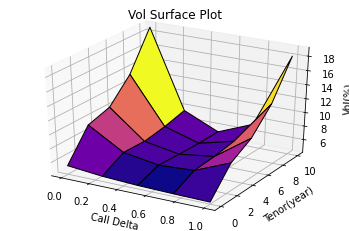

In [196]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

n=5
z=np.zeros((n,n))
# defining surface and axes
x = np.outer(np.linspace(0, 1, n), np.ones(n))
y = np.outer(np.linspace(0, 10, n), np.ones(n)).T

for i in range(n):
  for j in range(n):
    z[i][j] = 100*vol(x[i][0],y[0][j])
 
fig = plt.figure()

 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xlabel('Call Delta')
ax.set_ylabel('Tenor(year)')
ax.set_zlabel('Vol(%)')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma', edgecolor ='black')
#ax.view_init(00, 30)
ax.set_title('Vol Surface Plot')
plt.show()


Up and Out


In [103]:
print('Call and Put Price of Up and Out is',UpOut(df._get_value(0, 'Up & Out'),df._get_value(1, 'Up & Out'),df._get_value(4, 'Up & Out'),df._get_value(5, 'Up & Out'),df._get_value(6, 'Up & Out'),df._get_value(7, 'Up & Out'),df._get_value(8, 'Up & Out'),int(df._get_value(9, 'Up & Out')),df._get_value(2, 'Up & Out')))

Call and Put Price of Up and Out is (3.99442929195554, 63.7944817586448)


Down And Out

In [104]:
print('Call and Put Price of Down and Out is',DownOut(df._get_value(0, 'Down & Out'),df._get_value(1, 'Down & Out'),df._get_value(4, 'Down & Out'),df._get_value(5, 'Down & Out'),df._get_value(6, 'Down & Out'),df._get_value(7, 'Down & Out'),df._get_value(8, 'Down & Out'),int(df._get_value(9, 'Down & Out')),df._get_value(2, 'Down & Out')))

Call and Put Price of Down and Out is (29.23075213818435, 130.84491712788426)


Up and In

In [105]:
print('Call and Put Price of Up and In is',UpIn(df._get_value(0, 'Up & In'),df._get_value(1, 'Up & In'),df._get_value(4, 'Up & In'),df._get_value(5, 'Up & In'),df._get_value(6, 'Up & In'),df._get_value(7, 'Up & In'),df._get_value(8, 'Up & In'),int(df._get_value(9, 'Up & In')),df._get_value(2, 'Up & In')))

Call and Put Price of Up and In is (65.04037795585452, 2.8607287047352825)


Down and In

In [106]:
print('Call and Put Price of Down and In is',UpIn(df._get_value(0, 'Down & In'),df._get_value(1, 'Down & In'),df._get_value(4, 'Down & In'),df._get_value(5, 'Down & In'),df._get_value(6, 'Down & In'),df._get_value(7, 'Down & In'),df._get_value(8, 'Down & In'),int(df._get_value(9, 'Down & In')),df._get_value(2, 'Down & In')))

Call and Put Price of Down and In is (23.968762426219506, 147.99222662082323)
